In [1]:
# ========================================
# IMPORT LIBRARIES
# ========================================
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import VarianceThreshold

In [2]:
# ========================================
# IMPORT DATAFRAME
# ========================================
df = pd.read_csv('data/df01.csv', sep=',', na_filter=False, index_col=0, parse_dates=['launched_at'])

In [3]:
df.isnull().sum().sum()

0

In [4]:
df.isna().sum().sum()

0

In [5]:
df.columns[0:14]

Index(['id', 'launch_state', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'spotlight', 'comics', 'crafts', 'dance'],
      dtype='object')

In [47]:
# ========================================
# VARIABLE REDUCTION
# ========================================
info_variables = ['id','launched_at','category','country']

In [7]:
# ---- ZERO-VARIANCE ----
sel = VarianceThreshold(threshold=0.0)

In [12]:
sel.fit_transform(X=df.drop(columns=info_variables)).shape[1] - df.drop(columns=info_variables).shape[1]

0

In [81]:
# there are no zero-variance variables

*\# NEAR-ZERO VARIANCE*

There is much discussion about whether such variables should be removed - there are times where even very low variance variables have a large effect in predicting the outcome. We will keep these.

In [13]:
# ---- VARIABLE-OUTCOME CORRELATIONS ----
corr_threshold = 0.5

In [14]:
dftest = pd.DataFrame({'state':[0,1,0,1], 'spotlight':[0,1,0,1], 'days':[1,10,100,1000]})
dftest

,state,spotlight,days
0,0,0,1
1,1,1,10
2,0,0,100
3,1,1,1000


In [15]:
dftest.corr()

,state,spotlight,days
state,1.000000,1.000000,0.542642
spotlight,1.000000,1.000000,0.542642
days,0.542642,0.542642,1.000000


In [96]:
dftest['state'].corr(dftest['spotlight'])

1.0

In [97]:
dftest['state'].corr(dftest['days'])

0.5426422775636054

In [138]:
dftest.corr().drop(columns='state').iloc[0]

spotlight    1.000000
days         0.542642
Name: state, dtype: float64

In [209]:
df.drop(columns=info_variables).corr().drop(columns='launch_state').iloc[0]

goal            -0.034373
backers_count    0.115215
pledged_ratio    0.016668
funding_days    -0.098283
staff_pick       0.251567
spotlight        1.000000
comics           0.106614
crafts          -0.048837
dance            0.061359
design           0.020498
fashion          0.016958
film & video     0.009997
food            -0.126937
games            0.019431
journalism      -0.093388
music            0.078656
photography     -0.026630
publishing       0.085045
technology      -0.145246
theater          0.067869
AF               0.003649
AG               0.000795
AL              -0.000494
AM              -0.001888
AQ               0.001962
AR               0.001122
AT              -0.011944
AU              -0.041496
AX               0.002934
AZ              -0.002772
                   ...   
SV              -0.000726
SX              -0.003921
SY               0.001124
SZ               0.004149
TC              -0.003921
TH              -0.004759
TJ               0.002074
TL          

In [16]:
df_corr_variable_outcome = pd.DataFrame(abs(df.drop(columns=info_variables).corr().drop(columns='launch_state').iloc[0])).reset_index()

In [17]:
df_corr_variable_outcome.columns = ['variable','corr_launch_state']

In [18]:
df_corr_variable_outcome.head()

,variable,corr_launch_state
0,goal,0.034373
1,backers_count,0.115215
2,pledged_ratio,0.016668
3,funding_days,0.098283
4,staff_pick,0.251567


In [19]:
df_corr_variable_outcome.sort_values(by='corr_launch_state', ascending=False).head()

,variable,corr_launch_state
5,spotlight,1.000000
4,staff_pick,0.251567
18,technology,0.145246
12,food,0.126937
1,backers_count,0.115215


In [152]:
# Looks like we do have some high correlation.

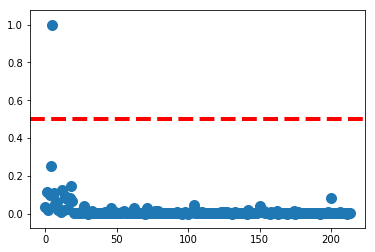

In [20]:
plt.scatter(x=df_corr_variable_outcome.index,y=df_corr_variable_outcome['corr_launch_state'], s=100)
plt.axhline(y=0.5, color='r', linestyle='--', linewidth=4)

In [21]:
df_corr_variable_outcome[df_corr_variable_outcome['corr_launch_state'] > 0.5]['variable']

5    spotlight
Name: variable, dtype: object

In [195]:
# The only variable of interest here is spotlight. From https://techcrunch.com/2015/03/25/kickstarter-spotlight/, 
# we see that spotlight happens for successfully funded projects and acts as a way to update the project timeline.
# It clearly does nothing in helping predict funding success; drop it.

In [22]:
df.columns.shape

(219,)

In [23]:
df.columns[0:14]

Index(['id', 'launch_state', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'spotlight', 'comics', 'crafts', 'dance'],
      dtype='object')

In [24]:
df.drop(columns='spotlight', inplace=True)

In [25]:
df.columns.shape

(218,)

In [26]:
df.columns[0:14]

Index(['id', 'launch_state', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'comics', 'crafts', 'dance', 'design'],
      dtype='object')

In [29]:
# Variable-variable correlation data

In [38]:
df.columns

Index(['id', 'launch_state', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       ...
       'VE', 'VI', 'VN', 'VU', 'WS', 'XK', 'YE', 'ZA', 'ZM', 'ZW'],
      dtype='object', length=218)

In [72]:
df.drop(columns=info_variables).drop(columns='launch_state').columns

Index(['goal', 'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'comics', 'crafts', 'dance', 'design', 'fashion',
       ...
       'VE', 'VI', 'VN', 'VU', 'WS', 'XK', 'YE', 'ZA', 'ZM', 'ZW'],
      dtype='object', length=213)

In [274]:
corMat = abs(df.drop(columns=info_variables).drop(columns='launch_state').corr())

In [275]:
corMat.shape

(213, 213)

In [276]:
df.shape

(173887, 218)

In [277]:
corMat.head()

,goal,backers_count,pledged_ratio,funding_days,staff_pick,comics,crafts,dance,design,fashion,...,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
goal,1.000000,0.009228,0.000705,0.026012,0.006075,0.006768,0.005136,0.004320,0.003572,0.005840,...,0.000238,0.000079,0.000070,0.000136,0.000107,0.000137,0.000158,0.000675,0.000243,0.000228
backers_count,0.009228,1.000000,0.010888,0.006374,0.152003,0.012221,0.017867,0.012263,0.035396,0.001989,...,0.001146,0.001133,0.001597,0.000368,0.000416,0.000089,0.000278,0.000396,0.000770,0.000876
pledged_ratio,0.000705,0.010888,1.000000,0.004361,0.001973,0.007921,0.000607,0.001886,0.000200,0.001622,...,0.000147,0.000158,0.000251,0.000055,0.000060,0.000053,0.000072,0.000374,0.000119,0.000131
funding_days,0.026012,0.006374,0.004361,1.000000,0.009698,0.020172,0.035283,0.016211,0.006213,0.037684,...,0.007849,0.002725,0.000736,0.002881,0.000867,0.001889,0.001922,0.001408,0.000482,0.002635
staff_pick,0.006075,0.152003,0.001973,0.009698,1.000000,0.088465,0.021553,0.030920,0.013350,0.022998,...,0.003399,0.003652,0.000677,0.002433,0.003646,0.002433,0.001636,0.002438,0.002829,0.001867


In [278]:
df.columns[0:14]

Index(['id', 'launch_state', 'launched_at', 'category', 'country', 'goal',
       'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'comics', 'crafts', 'dance', 'design'],
      dtype='object')

In [279]:
corMat.columns[0:14]

Index(['goal', 'backers_count', 'pledged_ratio', 'funding_days', 'staff_pick',
       'comics', 'crafts', 'dance', 'design', 'fashion', 'film & video',
       'food', 'games', 'journalism'],
      dtype='object')

In [280]:
# df = df.where(np.triu(np.ones(df.shape)).astype(np.bool))
corMat_upper = corMat.where(np.triu(np.ones(corMat.shape), k=1).astype(np.bool))

In [337]:
corMat_upper.head()

,goal,backers_count,pledged_ratio,funding_days,staff_pick,comics,crafts,dance,design,fashion,...,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
goal,NaN,0.009228,0.000705,0.026012,0.006075,0.006768,0.005136,0.004320,0.003572,0.005840,...,0.000238,0.000079,0.000070,0.000136,0.000107,0.000137,0.000158,0.000675,0.000243,0.000228
backers_count,NaN,NaN,0.010888,0.006374,0.152003,0.012221,0.017867,0.012263,0.035396,0.001989,...,0.001146,0.001133,0.001597,0.000368,0.000416,0.000089,0.000278,0.000396,0.000770,0.000876
pledged_ratio,NaN,NaN,NaN,0.004361,0.001973,0.007921,0.000607,0.001886,0.000200,0.001622,...,0.000147,0.000158,0.000251,0.000055,0.000060,0.000053,0.000072,0.000374,0.000119,0.000131
funding_days,NaN,NaN,NaN,NaN,0.009698,0.020172,0.035283,0.016211,0.006213,0.037684,...,0.007849,0.002725,0.000736,0.002881,0.000867,0.001889,0.001922,0.001408,0.000482,0.002635
staff_pick,NaN,NaN,NaN,NaN,NaN,0.088465,0.021553,0.030920,0.013350,0.022998,...,0.003399,0.003652,0.000677,0.002433,0.003646,0.002433,0.001636,0.002438,0.002829,0.001867


In [292]:
corMat.max().max()

1.0

In [285]:
corMat_upper.max().max()

0.5426473224100894

In [317]:
corMat_upper.unstack().sort_values(kind='quicksort')[corMat_upper.unstack().sort_values(kind='quicksort') > .5]

US  GB    0.542647
dtype: float64

In [318]:
# It looks like the countries US and GB are highly correlated.

In [322]:
df[df['country'] == 'US'].shape[0]

132065

In [323]:
df[df['country'] == 'GB'].shape[0]

14832

In [324]:
df[df['country'] == 'US'].shape[0] / df[df['country'] == 'GB'].shape[0]

8.90405879180151

In [ ]:
# There are ~9x more US projects than GB - keep US and drop GP as a 

In [332]:
df[df['country'] == 'US'].shape[0]

132065

In [333]:
df[df['US'] == 1].shape[0]

132065

In [334]:
df[df['country'] == 'GB'].shape[0]

14832

In [346]:
df[df['GB'] == 1].shape[0]

14832

In [336]:
# While seemingly correlated, it doesn't actually make sense to drop one country because it's correlated with another. Let's keep everything!

In [347]:
corMat.head()

,goal,backers_count,pledged_ratio,funding_days,staff_pick,comics,crafts,dance,design,fashion,...,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
goal,1.000000,0.009228,0.000705,0.026012,0.006075,0.006768,0.005136,0.004320,0.003572,0.005840,...,0.000238,0.000079,0.000070,0.000136,0.000107,0.000137,0.000158,0.000675,0.000243,0.000228
backers_count,0.009228,1.000000,0.010888,0.006374,0.152003,0.012221,0.017867,0.012263,0.035396,0.001989,...,0.001146,0.001133,0.001597,0.000368,0.000416,0.000089,0.000278,0.000396,0.000770,0.000876
pledged_ratio,0.000705,0.010888,1.000000,0.004361,0.001973,0.007921,0.000607,0.001886,0.000200,0.001622,...,0.000147,0.000158,0.000251,0.000055,0.000060,0.000053,0.000072,0.000374,0.000119,0.000131
funding_days,0.026012,0.006374,0.004361,1.000000,0.009698,0.020172,0.035283,0.016211,0.006213,0.037684,...,0.007849,0.002725,0.000736,0.002881,0.000867,0.001889,0.001922,0.001408,0.000482,0.002635
staff_pick,0.006075,0.152003,0.001973,0.009698,1.000000,0.088465,0.021553,0.030920,0.013350,0.022998,...,0.003399,0.003652,0.000677,0.002433,0.003646,0.002433,0.001636,0.002438,0.002829,0.001867


In [364]:
corMat_upper.head()

,goal,backers_count,pledged_ratio,funding_days,staff_pick,comics,crafts,dance,design,fashion,...,VE,VI,VN,VU,WS,XK,YE,ZA,ZM,ZW
goal,NaN,0.009228,0.000705,0.026012,0.006075,0.006768,0.005136,0.004320,0.003572,0.005840,...,0.000238,0.000079,0.000070,0.000136,0.000107,0.000137,0.000158,0.000675,0.000243,0.000228
backers_count,NaN,NaN,0.010888,0.006374,0.152003,0.012221,0.017867,0.012263,0.035396,0.001989,...,0.001146,0.001133,0.001597,0.000368,0.000416,0.000089,0.000278,0.000396,0.000770,0.000876
pledged_ratio,NaN,NaN,NaN,0.004361,0.001973,0.007921,0.000607,0.001886,0.000200,0.001622,...,0.000147,0.000158,0.000251,0.000055,0.000060,0.000053,0.000072,0.000374,0.000119,0.000131
funding_days,NaN,NaN,NaN,NaN,0.009698,0.020172,0.035283,0.016211,0.006213,0.037684,...,0.007849,0.002725,0.000736,0.002881,0.000867,0.001889,0.001922,0.001408,0.000482,0.002635
staff_pick,NaN,NaN,NaN,NaN,NaN,0.088465,0.021553,0.030920,0.013350,0.022998,...,0.003399,0.003652,0.000677,0.002433,0.003646,0.002433,0.001636,0.002438,0.002829,0.001867


In [365]:
corMat_values = corMat_upper.values[np.triu_indices(corMat_upper.shape[1], k=1)]

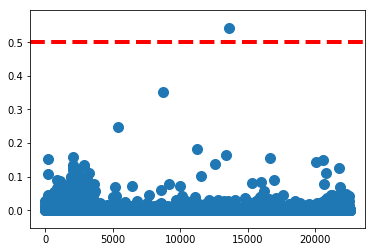

In [366]:
plt.scatter(x=range(0,len(corMat_values)),y=corMat_values, s=100)
plt.axhline(y=0.5, color='r', linestyle='--', linewidth=4)

In [367]:
# ========================================
# SAVE CSV
# ========================================
df.to_csv('data/df02.csv', sep=",")